In [37]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbr
import importlib
import serial
import threading
import time
import queue
from scipy.signal import find_peaks
import csv

import random
from scipy.stats import beta
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300

In [38]:
meta_data = np.load("teensy_data_noiseless/averages.npy")[:16]
meta_data_n = np.load("teensy_data_noisy/averages.npy")[:16]

# meta_data_f = np.load("teensy_data_full_noiseless/averages.npy")
# meta_data_f_n = np.load("teensy_data_full_noisy/averages.npy")

a = 14

weight_cal = 36.4
force_cal  = 342.75
convert = weight_cal/force_cal

print((meta_data[a,2] - meta_data_n[a,2])*convert)
print(meta_data[a,4])

0.6594302941891579
3.4


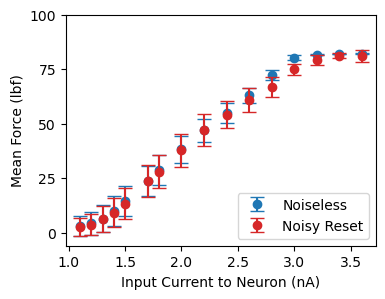

In [39]:
# Conversion to pound force
weight_cal = 36.4
force_cal  = 342.75

y1 = 0
y2 = 25
y3 = 50
y4 = 75
y5 = 100

ytick = [y1, y2, y3, y4, y5]
yloc  = [y1 * force_cal/weight_cal,
         y2 * force_cal/weight_cal,
         y3 * force_cal/weight_cal,
         y4 * force_cal/weight_cal,
         y5 * force_cal/weight_cal]

# Plot half-center voltages
plt.figure(figsize=(4,3))
plt.errorbar(meta_data[:,4],   meta_data[:,2],   yerr=meta_data[:,3],   fmt='o', color='C0',ecolor='C0', capsize=5,label='Noiseless', zorder=0)
plt.errorbar(meta_data_n[:,4], meta_data_n[:,2], yerr=meta_data_n[:,3], fmt='o', color='C3',ecolor='C3', capsize=5,label='Noisy Reset', zorder=1)
# plt.title('BPA Force over Current')
plt.yticks([yloc[0],yloc[1],yloc[2],yloc[3],yloc[4]],[ytick[0],ytick[1],ytick[2],ytick[3],ytick[4]])
plt.xlabel('Input Current to Neuron (nA)')
plt.ylabel('Mean Force (lbf)')
plt.legend(loc="lower right")

# plt.xlim(42,52)
# plt.ylim(650,950)

# Save figure
plt.savefig('/Users/jacklutz/Desktop/1_Academic/1_MJL_Research/2_Writing/JL_Living_Machines_2025/3_figures/force_current.png', bbox_inches='tight')

# Show the figure
plt.show()

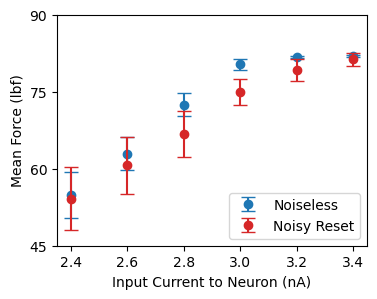

In [40]:
t1 = 0
t2 = 45
t3 = 60
t4 = 75
t5 = 90

ttick = [t1, t2, t3, t4, t5]
tloc  = [t1 * force_cal/weight_cal,
         t2 * force_cal/weight_cal,
         t3 * force_cal/weight_cal,
         t4 * force_cal/weight_cal,
         t5 * force_cal/weight_cal]

# Plot half-center voltages
plt.figure(figsize=(4,3))
plt.errorbar(meta_data[9:15,4],   meta_data[9:15,2],   yerr=meta_data[9:15,3],   fmt='o', color='C0',ecolor='C0', capsize=5,label='Noiseless', zorder=0)
plt.errorbar(meta_data_n[9:15,4], meta_data_n[9:15,2], yerr=meta_data_n[9:15,3], fmt='o', color='C3',ecolor='C3', capsize=5,label='Noisy Reset', zorder=1)
# plt.title('BPA Force over Current')
plt.yticks([tloc[1],tloc[2],tloc[3],tloc[4]],[ttick[1],ttick[2],ttick[3],ttick[4]])
plt.xlabel('Input Current to Neuron (nA)')
plt.ylabel('Mean Force (lbf)')
plt.legend(loc="lower right")

# plt.xlim(42,52)
# plt.ylim(650,950)

# Save figure
plt.savefig('/Users/jacklutz/Desktop/1_Academic/1_MJL_Research/2_Writing/JL_Living_Machines_2025/3_figures/force_current_transition.png', bbox_inches='tight')

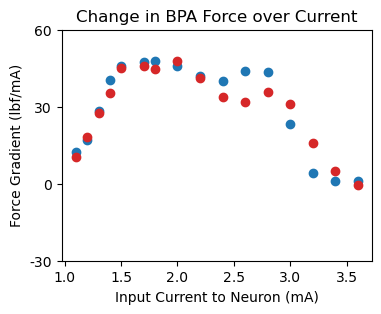

In [41]:
# Conversion to pound force
weight_cal = 36.4
force_cal  = 342.75

d1 = -60
d2 = -30
d3 = 0
d4 = 30
d5 = 60

dtick = [d1, d2, d3, d4, d5]
dloc  = [d1 * force_cal/weight_cal,
         d2 * force_cal/weight_cal,
         d3 * force_cal/weight_cal,
         d4 * force_cal/weight_cal,
         d5 * force_cal/weight_cal]

# Plot half-center voltages
plt.figure(figsize=(4,3))
plt.scatter(meta_data[:,4],   np.gradient(meta_data[:,2],meta_data[:,4]),   color='C0',label='Noiseless', zorder=0)
plt.scatter(meta_data_n[:,4], np.gradient(meta_data_n[:,2],meta_data_n[:,4]), color='C3',label='Noisy Reset', zorder=1)
plt.title('Change in BPA Force over Current')
plt.yticks([dloc[1],dloc[2],dloc[3],dloc[4]],[dtick[1],dtick[2],dtick[3],dtick[4]])
plt.xlabel('Input Current to Neuron (mA)')
plt.ylabel('Force Gradient (lbf/mA)')


# plt.xlim(42,52)
# plt.ylim(650,950)

# Save figure
plt.savefig('/Users/jacklutz/Desktop/1_Academic/1_MJL_Research/2_Writing/JL_Living_Machines_2025/3_figures/force_gradient.png', bbox_inches='tight')

# Show the figure
plt.show()

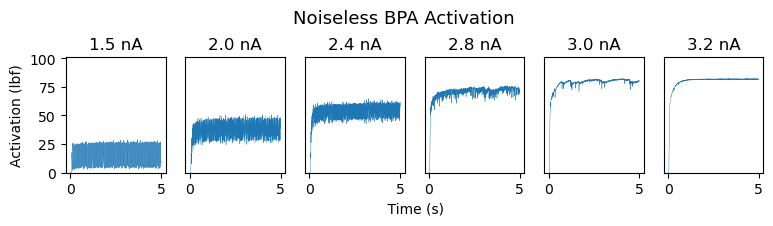

In [42]:
meta_data_plots_noiseless = np.load("teensy_data_noiseless/averages.npy")
current = meta_data_plots_noiseless[:,4].round(1)
teensy_data_0 = np.load("teensy_data_noiseless/data_4.npy")
teensy_data_1 = np.load("teensy_data_noiseless/data_7.npy")
teensy_data_2 = np.load("teensy_data_noiseless/data_9.npy")
teensy_data_3 = np.load("teensy_data_noiseless/data_11.npy")
teensy_data_4 = np.load("teensy_data_noiseless/data_12.npy")
teensy_data_5 = np.load("teensy_data_noiseless/data_13.npy")

plt.figure(figsize=(9,1.5))

plt.subplot(1,6,1)
plt.plot(teensy_data_0[:,0],teensy_data_0[:,1],color='C0', linewidth=0.3)
plt.ylim(0,950)
plt.title(f"{current[4]} nA")
plt.yticks(yloc,ytick)
plt.ylabel('Activation (lbf)')
plt.subplot(1,6,2)
plt.plot(teensy_data_1[:,0],teensy_data_1[:,1],color='C0', linewidth=0.3)
plt.ylim(0,950)
plt.title(f"{current[7]} nA")
plt.yticks([])
plt.subplot(1,6,3)
plt.plot(teensy_data_2[:,0],teensy_data_2[:,1],color='C0', linewidth=0.3)
plt.ylim(0,950)
plt.title(f"{current[9]} nA")
plt.xlabel("                            Time (s)")
plt.yticks([])
plt.subplot(1,6,4)
plt.plot(teensy_data_3[:,0],teensy_data_3[:,1],color='C0', linewidth=0.3)
plt.ylim(0,950)
plt.title(f"{current[11]} nA")
plt.yticks([])
plt.subplot(1,6,5)
plt.plot(teensy_data_4[:,0],teensy_data_4[:,1],color='C0', linewidth=0.3)
plt.ylim(0,950)
plt.title(f"{current[12]} nA")
plt.yticks([])
plt.subplot(1,6,6)
plt.plot(teensy_data_5[:,0],teensy_data_5[:,1],color='C0', linewidth=0.3)
plt.ylim(0,950)
plt.title(f"{current[13]} nA")
plt.yticks([])

plt.suptitle("Noiseless BPA Activation", fontsize=13, y=1.2)


# Save figure
plt.savefig('/Users/jacklutz/Desktop/1_Academic/1_MJL_Research/2_Writing/JL_Living_Machines_2025/3_figures/currents_noiseless.png', bbox_inches='tight')



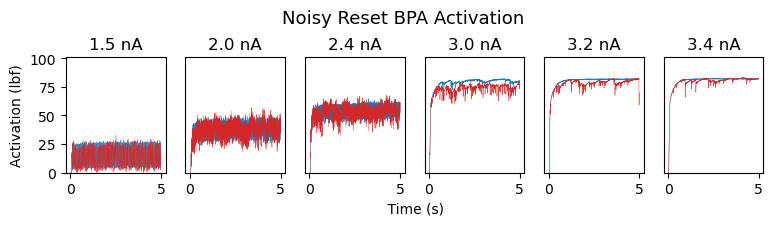

In [43]:
meta_data_plots_noiseless = np.load("teensy_data_noiseless/averages.npy")
current = meta_data_plots_noiseless[:,4].round(1)
teensy_data_noiseless0 = np.load("teensy_data_noiseless/data_4.npy")
teensy_data_noiseless1 = np.load("teensy_data_noiseless/data_7.npy")
teensy_data_noiseless2 = np.load("teensy_data_noiseless/data_9.npy")
teensy_data_noiseless3 = np.load("teensy_data_noiseless/data_12.npy")
teensy_data_noiseless4 = np.load("teensy_data_noiseless/data_13.npy")
teensy_data_noiseless5 = np.load("teensy_data_noiseless/data_14.npy")

meta_data_plots_noisy  = np.load("teensy_data_noisy/averages.npy")
current = meta_data_plots_noisy [:,4].round(1)
teensy_data_noisy_0 = np.load("teensy_data_noisy/data_4.npy")
teensy_data_noisy_1 = np.load("teensy_data_noisy/data_7.npy")
teensy_data_noisy_2 = np.load("teensy_data_noisy/data_9.npy")
teensy_data_noisy_3 = np.load("teensy_data_noisy/data_12.npy")
teensy_data_noisy_4 = np.load("teensy_data_noisy/data_13.npy")
teensy_data_noisy_5 = np.load("teensy_data_noisy/data_14.npy") 

plt.figure(figsize=(9,1.5))

plt.subplot(1,6,1)
plt.plot(teensy_data_noiseless0[:,0],teensy_data_noiseless0[:,1],color='C0', linewidth=0.3)
plt.plot(teensy_data_noisy_0[:,0],teensy_data_noisy_0[:,1],color='C3', linewidth=0.3)
plt.ylim(0,950)
plt.title(f"{current[4]} nA")
plt.yticks(yloc,ytick)
plt.ylabel('Activation (lbf)')
plt.subplot(1,6,2)
plt.plot(teensy_data_noiseless1[:,0],teensy_data_noiseless1[:,1],color='C0', linewidth=0.3)
plt.plot(teensy_data_noisy_1[:,0],teensy_data_noisy_1[:,1],color='C3', linewidth=0.3)
plt.ylim(0,950)
plt.title(f"{current[7]} nA")
plt.yticks([])
plt.subplot(1,6,3)
plt.plot(teensy_data_noiseless2[:,0],teensy_data_noiseless2[:,1],color='C0', linewidth=0.3)
plt.plot(teensy_data_noisy_2[:,0],teensy_data_noisy_2[:,1],color='C3', linewidth=0.3)
plt.ylim(0,950)
plt.title(f"{current[9]} nA")
plt.xlabel("                            Time (s)")
plt.yticks([])
plt.subplot(1,6,4)
plt.plot(teensy_data_noiseless3[:,0],teensy_data_noiseless3[:,1],color='C0', linewidth=0.3)
plt.plot(teensy_data_noisy_3[:,0],teensy_data_noisy_3[:,1],color='C3', linewidth=0.3)
plt.ylim(0,950)
plt.title(f"{current[12]} nA")
plt.yticks([])
plt.subplot(1,6,5)
plt.plot(teensy_data_noiseless4[:,0],teensy_data_noiseless4[:,1],color='C0', linewidth=0.3)
plt.plot(teensy_data_noisy_4[:,0],teensy_data_noisy_4[:,1],color='C3', linewidth=0.3)
plt.ylim(0,950)
plt.title(f"{current[13]} nA")
plt.yticks([])
plt.subplot(1,6,6)
plt.plot(teensy_data_noiseless5[:,0],teensy_data_noiseless5[:,1],color='C0', linewidth=0.3)
plt.plot(teensy_data_noisy_5[:,0],teensy_data_noisy_5[:,1],color='C3', linewidth=0.3)
plt.ylim(0,950)
plt.title(f"{current[14]} nA")
plt.yticks([])

plt.suptitle("Noisy Reset BPA Activation", fontsize=13, y=1.2)



# Save figure
plt.savefig('/Users/jacklutz/Desktop/1_Academic/1_MJL_Research/2_Writing/JL_Living_Machines_2025/3_figures/currents_noisy.png', bbox_inches='tight')



/var/folders/rw/1rk7d4q9143_tx9zxftlfh840000gn/T/ipykernel_54957/3059109389.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


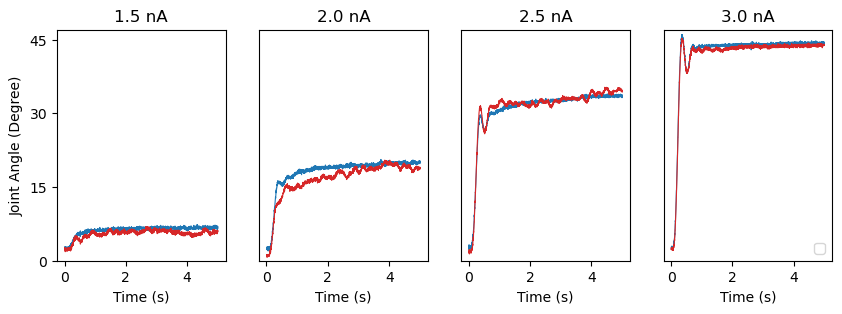

In [44]:
# Conversion to pound force
angle_cal_1 = 0
angle_cal_2 = -47
digital_cal_1  = 226
digital_cal_2  = 559

a1 = 0
a2 = 15
a3 = 30
a4 = 45

atick = [a1, a2, a3, a4]
aloc  = [(-(digital_cal_2 - digital_cal_1)/(angle_cal_2 - angle_cal_1)) * (a1 - angle_cal_1) + digital_cal_1,
         (-(digital_cal_2 - digital_cal_1)/(angle_cal_2 - angle_cal_1)) * (a2 - angle_cal_1) + digital_cal_1,
         (-(digital_cal_2 - digital_cal_1)/(angle_cal_2 - angle_cal_1)) * (a3 - angle_cal_1) + digital_cal_1,
         (-(digital_cal_2 - digital_cal_1)/(angle_cal_2 - angle_cal_1)) * (a4 - angle_cal_1) + digital_cal_1]

meta_data_joint_noiseless = np.load("teensy_data_joint_noiseless/averages.npy")
teensy_data_joint_0 = np.load("teensy_data_joint_noiseless/data_0.npy")
teensy_data_joint_1 = np.load("teensy_data_joint_noiseless/data_1.npy")
teensy_data_joint_2 = np.load("teensy_data_joint_noiseless/data_2.npy")
teensy_data_joint_3 = np.load("teensy_data_joint_noiseless/data_4.npy")
teensy_data_joint_4 = np.load("teensy_data_joint_noiseless/data_4.npy")
teensy_data_joint_5 = np.load("teensy_data_joint_noiseless/data_5.npy")

meta_data_joint_noisy = np.load("teensy_data_joint_noisy/averages.npy")
teensy_data_joint_0_noisy = np.load("teensy_data_joint_noisy/data_0.npy")
teensy_data_joint_1_noisy = np.load("teensy_data_joint_noisy/data_1.npy")
teensy_data_joint_2_noisy = np.load("teensy_data_joint_noisy/data_2.npy")
teensy_data_joint_3_noisy = np.load("teensy_data_joint_noisy/data_4.npy")
teensy_data_joint_4_noisy = np.load("teensy_data_joint_noisy/data_4.npy")
teensy_data_joint_5_noisy = np.load("teensy_data_joint_noisy/data_5.npy")

plt.figure(figsize=(10,3))

plt.subplot(1,4,1)
plt.plot(teensy_data_joint_0[:,0],teensy_data_joint_0[:,1],color='C0', linewidth=0.8)
plt.plot(teensy_data_joint_0_noisy[:,0],teensy_data_joint_0_noisy[:,1],color='C3', linewidth=0.8)
plt.ylim(digital_cal_1,digital_cal_2)
plt.title(f"{meta_data_joint_noiseless[0,4]} nA")
plt.yticks(aloc,atick)
plt.ylabel('Joint Angle (Degree)')
plt.xlabel("Time (s)")
plt.subplot(1,4,2)
plt.plot(teensy_data_joint_1[:,0],teensy_data_joint_1[:,1],color='C0', linewidth=0.8)
plt.plot(teensy_data_joint_1_noisy[:,0],teensy_data_joint_1_noisy[:,1],color='C3', linewidth=0.8)
plt.ylim(digital_cal_1,digital_cal_2)
plt.title(f"{meta_data_joint_noiseless[1,4]} nA")
plt.xlabel("Time (s)")
plt.yticks([])
plt.subplot(1,4,3)
plt.plot(teensy_data_joint_2[:,0],teensy_data_joint_2[:,1],color='C0', linewidth=0.8)
plt.plot(teensy_data_joint_2_noisy[:,0],teensy_data_joint_2_noisy[:,1],color='C3', linewidth=0.8)
plt.ylim(digital_cal_1,digital_cal_2)
plt.title(f"{meta_data_joint_noiseless[2,4]} nA")
plt.xlabel("Time (s)")
plt.yticks([])
plt.subplot(1,4,4)
plt.plot(teensy_data_joint_3[:,0],teensy_data_joint_3[:,1],color='C0', linewidth=0.8)
plt.plot(teensy_data_joint_3_noisy[:,0],teensy_data_joint_3_noisy[:,1],color='C3', linewidth=0.8)
plt.ylim(digital_cal_1,digital_cal_2)
plt.title(f"{meta_data_joint_noiseless[3,4]} nA")
plt.xlabel("Time (s)")
plt.yticks([])
# plt.subplot(1,6,5)
# plt.plot(teensy_data_joint_4[:,0],teensy_data_joint_4[:,1],color='C0', linewidth=0.8)
# plt.plot(teensy_data_joint_4_noisy[:,0],teensy_data_joint_4_noisy[:,1],color='C3', linewidth=0.8)
# plt.ylim(digital_cal_1,digital_cal_2)
# plt.xticks([2.5],[meta_data_joint_noiseless[1,4]])
# plt.xlabel("Input Current to Presynaptic Neuron (mV)")
# plt.yticks([])
# plt.subplot(1,6,6)
# plt.plot(teensy_data_joint_5[:,0],teensy_data_joint_5[:,1],color='C0', linewidth=0.8, label="Noiseless")
# plt.plot(teensy_data_joint_5_noisy[:,0],teensy_data_joint_5_noisy[:,1],color='C3', linewidth=0.8, label="Noisy Reset")
# plt.ylim(digital_cal_1,digital_cal_2)
# plt.xticks([2.5],[meta_data_joint_noiseless[2,4]])
# plt.yticks([])
plt.legend(loc="lower right")



# plt.suptitle("Joint Angle Output from Noiseless and Noisy Reset Signals", fontsize=14, y=1.)


# Save figure
plt.savefig('/Users/jacklutz/Desktop/1_Academic/1_MJL_Research/2_Writing/JL_Living_Machines_2025/3_figures/joint_angles.png', bbox_inches='tight')



In [45]:
print(current)
print(meta_data_joint_noiseless)

[1.1 1.2 1.3 1.4 1.5 1.7 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.
 4.2 4.6 5. ]
[[1.82149362e+01 9.71147279e-14 2.73099333e+02 1.42879887e+00
  1.50000000e+00]
 [2.88184438e+01 2.23497456e-13 3.64459333e+02 2.65863616e+00
  2.00000000e+00]
 [3.90625000e+01 4.39256708e-13 4.59747333e+02 3.40286539e+00
  2.50000000e+00]
 [4.92610837e+01 6.48237093e-13 5.35222667e+02 1.86326404e+00
  3.00000000e+00]
 [5.91715976e+01 1.00046472e-12 5.38460667e+02 1.52374086e+00
  3.50000000e+00]
 [6.94444444e+01 1.39481179e-12 5.36451333e+02 1.67996971e+00
  4.00000000e+00]]
